In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import re

/home/ziyi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


(2222, 39)
(2222, 1)


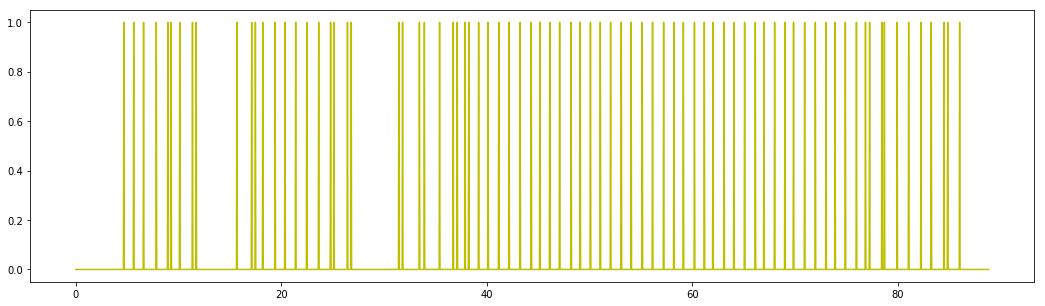

In [3]:
f_sensor=open('weallwalk/sensor/iPhoneSensors_T1_ID1_1L_GD.csv')  
dataset=pd.read_csv(f_sensor)
#dataset.head(10)

data_x = np.array(dataset.iloc[:, 0:39])
print(data_x.shape)
# print(data_x)

data_y = np.array(dataset.iloc[:, 40:41])
data_y = np.array(data_y)
    
print(data_y.shape)
# print(data_y)

plt.figure(figsize=(18, 5))
#plt.plot([i for i in range(0,1000)], [i[0] for i in rand_x], 'b')
plt.plot([i[0] for i in data_x], [i[0] for i in data_y], 'y')
plt.show()

R
L
R
L
R
L
R
L
R
L
10
1


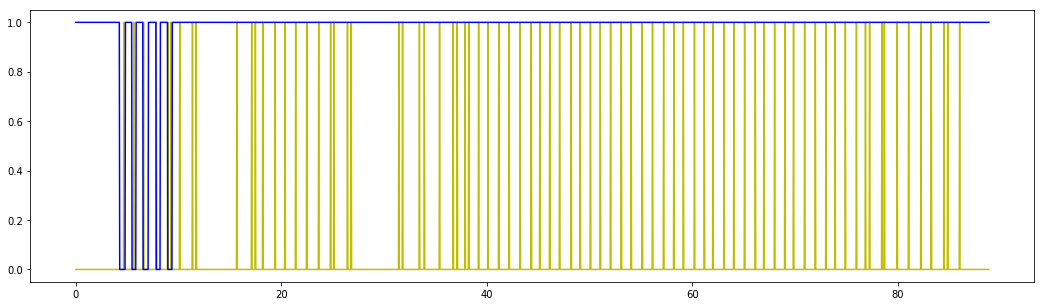

In [10]:
f = open('weallwalk/xml/T1_ID1_GD.xml')
cts = f.read()
f.close()

p_foot = re.compile(r'<WhichFoot>(.*?)</WhichFoot>')
all_foot = p_foot.findall(cts)

p_time = re.compile(r'<Time>(.*?)</Time>')
all_time = p_time.findall(cts)

strike_times = []
# for i in range(len(all_foot)):
for i in range(10):
    print(all_foot[i])
    if(all_foot[i]=='L'): #L1 R0
        strike_times.append([float(all_time[i]), 1])
    else:
        strike_times.append([float(all_time[i]), 0])

print(len(strike_times))

# left - 0, right = 1
strike_times.append([len(data_x)/25.0, 'E'])
step_direct = 1-strike_times[0][1]
print(step_direct)
window_y = []
strike_index=0
for i in range(len(data_x)):
    if(strike_index<len(strike_times) and i/25.0 < strike_times[strike_index][0]):
        window_y.append([step_direct])
    else:
        step_direct = 1-step_direct
        strike_index += 1
        window_y.append([step_direct])
        
# print window_y
plt.figure(figsize=(18, 5))
plt.plot([i[0] for i in data_x], [i[0] for i in data_y], 'y')
plt.plot([i[0] for i in data_x], [i[0] for i in window_y], 'b')
#plt.plot([i[0] for i in data_x], [i[6] for i in data_x], 'r')
plt.show()

In [4]:
# Training Parameters
learning_rate = 0.5
training_steps = 10000
#batch_size = 128
display_step = 200

# Network Parameters
num_input = 39
timesteps = 100 # timesteps
num_hidden = 100 # hidden layer num of features
num_output= 1

In [5]:
train_x,train_y=[],[] 
for i in range(0, 1300):
    x=data_x[i:i+timesteps]
    y=window_y[i+timesteps]
    train_x.append(x)
    train_y.append(y)

test_x,test_y=[],[] 
for i in range(1300, 2100):
    x=data_x[i:i+timesteps]
    y=window_y[i+timesteps]
    test_x.append(x)
    test_y.append(y)
    
#print(train_x[0])
print(len(train_y))
print(len(test_y))

1300
800


In [8]:
NUM_LAYERS=2

def LstmCell():
    lstm_cell = tf.contrib.rnn.BasicLSTMCell(num_hidden, state_is_tuple=True)
    return lstm_cell

graph = tf.Graph()
with graph.as_default(), tf.device('/cpu:0'):
    # tf Graph input
    X = tf.placeholder("float", [None, timesteps, num_input])
    Y = tf.placeholder("float", [None, num_output])
    
    # Define weights
    weights = {
        'out': tf.Variable(tf.random_normal([num_hidden, num_output]))
    }
    biases = {
        'out': tf.Variable(tf.random_normal([num_output]))
        #'out':tf.Variable(tf.zeros([1]))
    }
    
    def RNN(x, weights, biases):
        x = tf.unstack(x, timesteps, 1)
        cell = tf.contrib.rnn.MultiRNNCell([LstmCell() for _ in range(NUM_LAYERS)])
        outputs, state = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
        outputs = tf.transpose(outputs, [1,0,2])

        return tf.matmul(outputs[-1], weights['out']) + biases['out']
    

    logits = RNN(X, weights, biases)
    mean_train = tf.reduce_mean(X)
    loss = tf.reduce_mean(tf.squared_difference(logits, Y))
    #loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))

    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

In [ ]:
training_steps = 10001
with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    for step in range(training_steps):
        feed_dict = {X: train_x, Y: train_y}
        _, l, predictions, m = session.run([optimizer, loss, logits,mean_train], feed_dict = feed_dict)
        if (step % 200 == 0):
            print('Loss at step %d: %f' % (step, l))
    test_loss, test_logits = session.run([loss,logits], feed_dict={X: test_x, Y: test_y})

Initialized
Loss at step 0: 4.930566


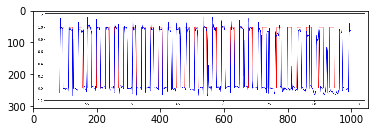

In [6]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

lena = mpimg.imread('lena.png') # 读取和代码处于同一目录下的 lena.png
# 此时 lena 就已经是一个 np.array 了，可以对它进行任意处理
lena.shape #(512, 512, 3)

plt.imshow(lena) # 显示图片
plt.axis('off') # 不显示坐标轴
plt.show()